<a href="https://colab.research.google.com/github/A8Y/StudyAI/blob/master/DNN_Day1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深層学習 実装演習レポート : Day1 

Day1では基礎的な全結合DNNを扱う







## Section 1: 入力層～中間層　(Input ~ Hidden Layers)



>与えられた情報

* 入力値　$x = \{ x_i : i = 1, ..., m \}$

> パラメータ

* 重み $W=[w_{ij}], i=1...,I$ and $j=1,...J$

* バイアス　$b$

> 中間層への入力 $u_j= \Sigma_i (w_{ij} x_i + b_j)$

> 中間層からの出力　$z_j = f(u_j)$

中間層の数とノードの数は任意で決めてよいが、多いからといってよいモデルとは限らない。

ノード数を増やすことによって精度をあげることが期待できるが、増やしすぎると計算機のメモリーを使いすぎる


## Section 2 活性化関数導入 

前の層から受け取った値を非線形に変換させる関数　$f(.)$で、次の層への出力値の大きさを決める

$$z = f(u)$$


入力値の値によって、次の層への信号のON/OFFや強弱を定める働きを持つ

### **活性化関数**

#####値の強弱

* 中間層：　しきい値の前後で信号の強弱を調整

* 出力層：　信号の大きさ(比率）はそのままに変換

>**ReLU関数** : 

$$f(u) = 
  \begin{cases}
    u \quad if \quad u>0 \\
    0 \quad else
  \end{cases}
$$

* 今最も使われている

* 勾配消失問題回避とスパース化に貢献することでよい結果をもたらしている

* しかし、これに固執せずに状況によって使い分けるのがよい


> **シグモイド（ロジスティック）関数**

$$f(u) = \frac{1}{1+e^{-u}}$$

* ０～１間を緩やかに変化する関数で、状態に対し、信号の強弱を伝えられるようになり、予想NN普及のきっかけとなった

* **勾配消失問題**：　大きな値では出力な変化が微細なため、勾配消失が起こることがある

* 小さな数字が０にならないため、計算上メモリーを消費する



## Section 3　出力層

###出力層の役割

中間層までの数字を人間が見て意味ある数値に変換

うまく学習がなされていない場合は数字にばらつきがない

あるカテゴリーに確率１で分類されるときは過学習が起きている可能性がある

####出力層用の活性化関数


> **恒等写像**　：　回帰問題

> **シグモイド関数**　：　2項分類問題

> **ソフトマックス関数**　多項分類問題

$$f(i, u) = \frac{ e^{u_i} }{\Sigma_{k=1} ^K e^{u_k}} $$

##### 確率出力

* 分類問題の場合、出力層の出力は０～１で総和を1とする

#### 誤差関数：　モデルの出力が実際の正解値をどの程度正確に予測できているかを評価する


* 回帰問題:  　2乗誤差

* 2項分類:  　 交差エントロピー

* 多項分類:   　交差エントロピー


訓練データサンプルあたりの誤差

> 2乗誤差: $E_n(W) = \frac{1}{2} \Sigma_{i=1} ^I (y_n - d_n) ^2$

> 交差エントロピー: $E_n(W) = - \Sigma_{i=1} ^I d_i \log y_i$

学習サイクルあたりの誤差

$$E(W) = \Sigma _{n=1} ^N E_n$$


## Section 4　勾配降下法

深層学習の目的

* 学習を通して誤差を最小にするネットワークを作成すること

* 誤差を最小化する最適な重みを探索すること

#### **勾配降下法**　（全サンプルの平均誤差を最小化するパラメータ推定法）

$$W^{(t+1)} \leftarrow  W^{(t)} - \epsilon \Delta E$$

$$\Delta E = \frac{\partial E}{\partial w}=[ \frac{\partial E}{\partial w_1},..., \frac{\partial E}{\partial w_M} ] $$

$\epsilon$ を**学習率**という。　学習率とは重みの更新速度を表している。

* 学習率が大きすぎると発散して最小値に到達しない

* 学習率が小さすぎると最小値に到着するまでに時間がかかりすぎたり、ローカルオプティマムにおちいって、グローバル最小値にとうちゃくしないことがある

*  誤差関数の値をより小さくする方向に重み及びバイアスを更新し次回のエポックに反映

* 学習率は定数とすることもできるが、適応的に変更することもできる。

#### **適応学習率手法** ：
モデル学習中に学習率を変動させることにより、学習時間短縮や精度向上につなげる


* Momentum

* AdaGrad

* Adadelta

* Adam　:　最も人気の手法

色々あるが、これはDay2で


#### **確率的勾配降下法**（SGD)

$$W^{(t+1)} = W^{(t)} - \epsilon \Delta E_n$$


* ランダムに抽出したサンプルの誤差

* 冗長なデータの計算コストの軽減

* 望まない局所極小解に収束するリスクの軽減

* オンライン学習ができる

### **ミニバッチ勾配降下法**

ランダムに分割したデータの集合（みにバッチ）$D_t$に属するサンプルの平均誤差

$$W^{(t+1)} = W^{(t)} - \epsilon \Delta E_t$$

$$E_t = \frac{1}{N_t} \Sigma _{n \in D_t} E_n$$

$$N_t = |D_t|$$

確率的勾配降下法のメリットを損なわず、計算機の計算資源を有効利用できる


誤差勾配の計算　：　

数値微分：計算がエポックごとにおおきく、扱いづらい.　よって、**誤差逆伝播法**で推定


#Section 5: 誤差逆伝播法

実際の出力値とその期待値の差に基づいて重みを更新する手法

算出された誤差を出力層から順に微分し前の層へと伝播。各重みに関する微分は連鎖率を持ちて計算される。

最小限の計算で各パラメータの微分値を解析的に計算する方法。





# 確認テスト

###Q1．

出力値の誤差を最小化するパラメータを最適化すること

> 3．重み

> 4．バイアス

###Q2．

入力層：2ノード

中間層　2層:　3ノード

出力層　:　1ノード

###Q3. 動物の例


###Q4.

u1 = np.dot(x, W1)

###Q5.

u = np.dot(x, W) + b

###Q6.

線形:　傾きが一定、平面、境界線が直線

非線形：傾きが変わり、曲線や曲面

分類問題で特徴値が2個で2クラスで言うと、一本の直線で分けることができる


###Q7.


#### 中間層出力
z = functions.sigmoid(u)



###Q8.

* 2乗することによってすべての誤差が正になりその大きさが正確に測れる

*誤差関数を微分した時に降りてきた２が打ち消されるように２で割っている　（＝０で最適値を推定するので、２で割っても同じ結果はおなじであるから、計算の便宜上の為））

###Q9.

# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:  受け取った値が2次元
        x = x.T
        x = x - np.max(x, axis=0)　　受け取った最大値を減算
        y = np.exp(x) / np.sum(np.exp(x), axis=0)　softmax関数
        return y.T

    x = x - np.max(x) # オーバーフロー対策 expの計算で機械がハンドルできる範囲に入力値を調整

    return np.exp(x) / np.sum(np.exp(x))

    (1) = y

    (2) = np.exp(x)

    (3) = np.sum(np.exp(x), axis=0) 
     or np.sum(np.exp(x))



###Q10.


# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # **教師データがone-hot-vectorの場合**、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

（１）cross_entropy_error(d, y)

（２）-np.sum(np.log(y[np.arange(batch_size), d] + 1e-7))

1e-7 を足して分母が０にならないように

###Q11.

>  network[key]  -= learning_rate * grad[key]

>  grad = backward(x, d, z1, y)

###Q12.

オンライン学習とは、オンラインで新しく入ってきたデータを使って既存のデータで学習したモデルをさらに学習させる

###Q13.

$W^{(t+1)} = W^{(t)} - \epsilon \Delta E_t$


###Q14.


def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad




###Q15.


    出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)

    W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)




# 演習結果と考察

### 演習１

*    間違いなどを減らすためにもパラメータの初期化は既存のNumpyなどのからの関数を使えば簡単かつ正確に生成できる

*    ネットワーク作成の関数に構造をパスして、関数を呼ぶさいパスすれば何度もかかなくてよいのではと思ったが、プログラミングの練習のためにわざとそうしているのかと考えた。

*   二値分類で使われていた誤差関数はMSEであるが、言い換えれば不正解の総数をサンプル数で割ったものを最小化させるということ。

### 演習２


*   活性化関数をReLUからSigmoidに変えただけで結果が大きく変わった。
*   従来の勾配降下法を試したところ、データが大きいのでSDGとは収束速度に大幅な差があるが、誤差はあまり変わらなかった。


### DN06_Jupyter演習

In [75]:
import sys
sys.path.append('/content/drive/My Drive/Pythonライブラリ基礎講座/DNN_code_colab_ver200425')
import numpy as np
from common import functions
import matplotlib.pyplot as plt
%matplotlib inline

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

In [76]:
## 試してみよう_配列の初期化
W = np.zeros(2)
print_vec('np.zeros(2)', W)

W = np.ones(2)
print_vec('np.ones(2)', W)

W = np.random.rand(2)
print_vec('np.random.rand(2)', W)

W = np.random.randint(5, size=(2))
print_vec("np.random.randint(5, size=(2))", W)

*** np.zeros(2) ***
[0. 0.]

*** np.ones(2) ***
[1. 1.]

*** np.random.rand(2) ***
[0.43650263 0.79955344]

*** np.random.randint(5, size=(2)) ***
[3 3]



In [77]:
# バイアス
#b = 0.5

## 試してみよう_数値の初期化
b = np.random.rand() # 0~1のランダム数値
print_vec("np.random.rand()", b)
b = np.random.rand() * 10 -5  # -5~5のランダム数値
print_vec("np.random.rand() * 10 -5", b)

*** np.random.rand() ***
0.5856142143557197

*** np.random.rand() * 10 -5 ***
4.295549932619698



In [78]:
## 試してみよう_配列の初期化
W = np.zeros((4,3))
print_vec('np.zeros((4,3))', W)
W = np.ones((4,3))
print_vec('np.ones((4,3))', W)
W = np.random.rand(4,3)
print_vec('np.random.rand(4,3)', W)
W = np.random.randint(5, size=(4,3))
print_vec('np.random.randint(5, size=(4,3))', W)


*** np.zeros((4,3)) ***
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

*** np.ones((4,3)) ***
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

*** np.random.rand(4,3) ***
[[0.83071584 0.6372866  0.53470712]
 [0.33190142 0.78796122 0.93467889]
 [0.45382509 0.12621668 0.1446323 ]
 [0.45846372 0.02170244 0.68870999]]

*** np.random.randint(5, size=(4,3)) ***
[[3 0 1]
 [1 4 2]
 [0 0 3]
 [1 0 2]]



In [79]:
# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)

#  総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
#z = functions.relu(u)
#z = functions.step_function(u)
print_vec("中間層出力", z)

*** 入力 ***
[ 1.  5.  2. -1.]

*** 総入力 ***
[11.29554993 24.29554993 19.29554993]

*** 中間層出力 ***
[0.99998757 1.         1.        ]



In [80]:
def print_vec_with_shape(text, vec):
    print("*** " + text + " ***")
    print("shape: " + repr(vec.shape))
    print(vec)
    # print("shape: " + str(x.shape))
    print("")
    
# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network['W1'] = np.random.rand(2,3)
    network['W2'] = np.random.rand(3,2)
    network['W3'] = np.random.rand(2,2)
    
    network['b1'] = np.random.rand(3)
    network['b2'] = np.random.rand(2)
    network['b3'] = np.random.randint(3,size=(2))

    print_vec_with_shape("重み1", network['W1'] )
    print_vec_with_shape("重み2", network['W2'] )
    print_vec_with_shape("重み3", network['W3'] )
    print_vec_with_shape("バイアス1", network['b1'] )
    print_vec_with_shape("バイアス2", network['b2'] )
    print_vec_with_shape("バイアス3", network['b3'] )
    
    return network

init_network()
pass

##### ネットワークの初期化 #####
*** 重み1 ***
shape: (2, 3)
[[0.58605453 0.39994767 0.76984527]
 [0.513545   0.43428008 0.71928181]]

*** 重み2 ***
shape: (3, 2)
[[0.8265873  0.61683718]
 [0.51401774 0.44763829]
 [0.49312548 0.71520144]]

*** 重み3 ***
shape: (2, 2)
[[0.4994635  0.20675837]
 [0.34456708 0.5978389 ]]

*** バイアス1 ***
shape: (3,)
[0.34958555 0.42103036 0.10799522]

*** バイアス2 ***
shape: (2,)
[0.82412773 0.78797587]

*** バイアス3 ***
shape: (2,)
[2 2]



### 【順伝播（単層・複数ユニット）】の実行


In [81]:
# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
shape: (2, 3)
[[0.44803054 0.04656722 0.7529525 ]
 [0.99854647 0.19637465 0.61465276]]

*** 重み2 ***
shape: (3, 2)
[[0.55967697 0.30589224]
 [0.87719712 0.76380368]
 [0.50206544 0.6865984 ]]

*** 重み3 ***
shape: (2, 2)
[[0.22890852 0.44335935]
 [0.47806763 0.94562758]]

*** バイアス1 ***
shape: (3,)
[0.93912119 0.63943487 0.21936652]

*** バイアス2 ***
shape: (2,)
[0.05530747 0.9611683 ]

*** バイアス3 ***
shape: (2,)
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[3.38424467 1.07875139 2.20162454]

*** 中間層出力1 ***
[3.38424467 1.07875139 2.20162454]

*** 総入力2 ***
[4.00102847 4.33196865]

*** 出力1 ***
[3.38424467 1.07875139 2.20162454]

出力合計: 6.664620610061251


# 多項分類


In [82]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}

    # network['W1'] = np.random.rand(2,3)
    network['W1'] = np.random.rand(3,5)
    # network['W2'] = np.random.rand(3,2)
    network['W2'] = np.random.rand(5,4)
    
    # network['b1'] = np.random.rand(3)
    # network['b2'] = np.random.rand(2)
    network['b1'] = np.random.rand(5)
    network['b2'] = np.random.rand(4)

    print_vec_with_shape("重み1", network['W1'] )
    print_vec_with_shape("重み2", network['W2'] )
    print_vec_with_shape("バイアス1", network['b1'] )
    print_vec_with_shape("バイアス2", network['b2'] )
    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
# x = np.array([1., 2.])
x = np.array([1., 2., 3.])

# 目標出力
d = np.array([0, 0, 0, 1])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
shape: (3, 5)
[[0.02080355 0.35703726 0.70297448 0.8271306  0.92888509]
 [0.31049829 0.98037932 0.7785204  0.60335306 0.83338619]
 [0.41404377 0.68619237 0.96998193 0.78603324 0.77942097]]

*** 重み2 ***
shape: (5, 4)
[[0.77268469 0.73443257 0.95256648 0.39384887]
 [0.18096782 0.29703014 0.71110009 0.56747713]
 [0.64616438 0.57196675 0.18499845 0.51164126]
 [0.64599149 0.55657273 0.39926314 0.98429677]
 [0.53709432 0.5328309  0.8143266  0.25791453]]

*** バイアス1 ***
shape: (5,)
[0.6142874  0.69457247 0.06191995 0.60416209 0.26854468]

*** バイアス2 ***
shape: (4,)
[0.34697523 0.71983603 0.69690434 0.96234088]

##### 順伝播開始 #####
*** 総入力1 ***
[2.49821882 5.07094548 5.23188101 4.99609853 5.20246504]

*** 中間層出力1 ***
[2.49821882 5.07094548 5.23188101 4.99609853 5.20246504]

*** 総入力2 ***
[12.59729528 12.6060212  13.88172717 13.76018833]

*** 出力1 ***
[0.11337156 0.11436516 0.40956779 0.36269549]

出力合計: 1.0

##### 結果表示 #####
*** 出力 ***
[0.11337156 0.11436516 0.409567

# 回帰

In [83]:
# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.random.rand(3,5)
    network['W2'] = np.random.rand(5,4)
    network['b1'] = np.random.rand(5)
    network['b2'] = np.random.rand(4)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))
    
    return y, z1

# 入力値
x = np.array([1., 2., 3.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4., 1., 1.])
# 誤差
loss = functions.mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.81956693 0.47270949 0.77985421 0.96318209 0.62732528]
 [0.81417819 0.40163993 0.05765601 0.83723279 0.54393859]
 [0.70889485 0.24577762 0.82982066 0.37503977 0.23554259]]

*** 重み2 ***
[[0.40934358 0.14099698 0.81232466 0.12139804]
 [0.99279449 0.55558041 0.17873099 0.71899382]
 [0.81752699 0.2636778  0.71639308 0.71933001]
 [0.76082458 0.7858035  0.19089217 0.22837706]
 [0.33515346 0.31325854 0.51104378 0.81491687]]

*** バイアス1 ***
[0.27919499 0.08201381 0.92763543 0.90825414 0.53989378]

*** バイアス2 ***
[0.39902082 0.85872227 0.20953143 0.27027   ]

##### 順伝播開始 #####
*** 総入力1 ***
[4.85380284 2.09533603 4.31226366 4.67102113 2.96172401]

*** 中間層出力1 ***
[4.85380284 2.09533603 4.31226366 4.67102113 2.96172401]

*** 総入力2 ***
[12.53798358  8.44255973 10.0214045   8.9482994 ]

*** 出力1 ***
[12.53798358  8.44255973 10.0214045   8.9482994 ]

出力合計: 18.89414767213779

##### 結果表示 #####
*** 中間層出力 ***
[4.85380284 2.09533603 4.31226366 4.67102113 2.96172401]

*** 

# 2値分類


In [84]:
#　2値分類
# 5-10-1ネットワーク

# ネットワーク作成
def init_network():
  network = {}
  network['W1'] = np.random.rand(5,10)
  network['W2'] = np.random.rand(10,1)
  network['b1'] = np.random.rand(10)*2-1
  network['b2'] = np.random.rand(1) *2-1

  return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    

    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = functions.sigmoid(u2)
            
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1

# input
x = np.random.rand(5)
# target
d = np.array([1])
# initializing network
network = init_network()
# forward propagation begins
y, z1 = forward(network, x)
# cross entropy
loss = functions.cross_entropy_error(d,y)

  ## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)


##### 順伝播開始 #####
*** 総入力1 ***
[1.61842518 0.43564462 1.20313375 1.51987092 0.9945731  0.35379814
 1.24165782 1.40991878 1.52338947 0.0257288 ]

*** 中間層出力1 ***
[1.61842518 0.43564462 1.20313375 1.51987092 0.9945731  0.35379814
 1.24165782 1.40991878 1.52338947 0.0257288 ]

*** 総入力2 ***
[6.51802083]

*** 出力1 ***
[0.99852559]

出力合計: 10.326140591094129

##### 結果表示 #####
*** 中間層出力 ***
[1.61842518 0.43564462 1.20313375 1.51987092 0.9945731  0.35379814
 1.24165782 1.40991878 1.52338947 0.0257288 ]

*** 出力 ***
[0.99852559]

*** 訓練データ ***
[1]

*** 誤差 ***
0.0014753993935066368



演習２


# DN15_Jupyter演習２

In [85]:
# SGD
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()
    
    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    
    ## 試してみよう
    # z1 = functions.relu(u1)
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2   
    
    return z1, y

def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

##### 結果表示 #####


/content/drive/My Drive/Pythonライブラリ基礎講座/DNN_code_colab_ver200425/common/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


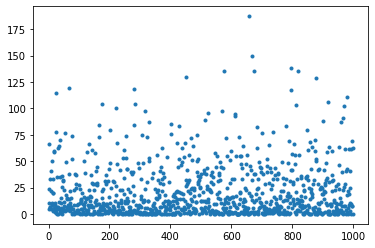

In [86]:
# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5?5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# SGD勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

In [ ]:
リンク先URL：http://study-ai.com/jdla/

バナー画像：http://ai999.careers/bnr_jdla.png